Predict stock market price for TESLA.

Imports

In [1]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

Read previous 'TSLA' data from Yahoo 

In [2]:
#using yfinance to download latest data from Yahoo.com
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

[*********************100%%**********************]  1 of 1 completed


Extract the 'close' column

In [3]:
data = df['Close']

Fit the data into a machine learning model ARIMA

In [4]:
model = ARIMA(data, order=(5, 1, 0))
model_fit = model.fit()

c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Prediction for next 30 days

In [5]:
predictions = model_fit.forecast(steps=30)

c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Calculate MAE and prediction score

In [6]:
actual_prices = data[-30:].values  # Actual prices for the last 30 days
mae = mean_absolute_error(actual_prices, predictions)

#percentage score
prediction_percentage_score = 100 - (mae / actual_prices.mean() * 100)


Create a range for predection values

In [7]:
last_date = df.index[-1]
predictions_index = pd.date_range(start=last_date, periods=31)  # 31 days including the last day

Plot

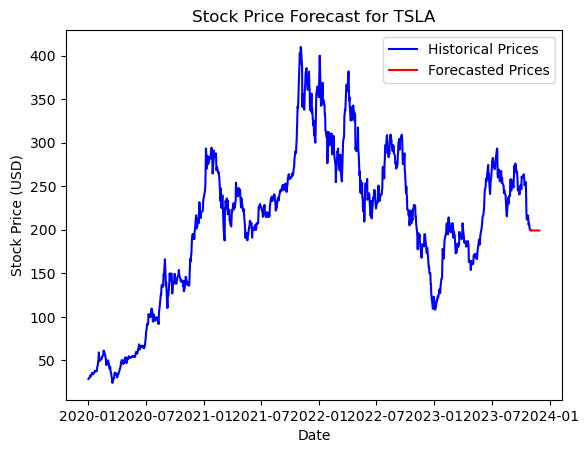

Forecasted Prices for the Next 30 Days:
964    199.801805
965    199.328247
966    199.564468
967    199.040421
968    199.186573
969    199.144892
970    199.172580
971    199.132642
972    199.153241
973    199.146644
974    199.149735
975    199.146430
976    199.148641
977    199.147722
978    199.148105
979    199.147807
980    199.148026
981    199.147915
982    199.147964
983    199.147934
984    199.147955
985    199.147943
986    199.147949
987    199.147946
988    199.147948
989    199.147946
990    199.147947
991    199.147947
992    199.147947
993    199.147947
Name: predicted_mean, dtype: float64
Mean Absolute Error (MAE): 43.197374096645355
Prediction Percentage Score: 82.17820438428011


In [8]:
plt.plot(df.index, data, label='Historical Prices', color='blue')
plt.plot(predictions_index[1:], predictions, label='Forecasted Prices', color='red')  # Exclude the first date in the forecast
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Stock Price Forecast for TSLA')
plt.legend()
plt.show()

print("Forecasted Prices for the Next 30 Days:")
print(predictions)
print("Mean Absolute Error (MAE):", mae)
print("Prediction Percentage Score:", prediction_percentage_score)
